In [3]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
import pickle
from sklearn.ensemble import RandomForestClassifier
import scipy.spatial.distance as spd

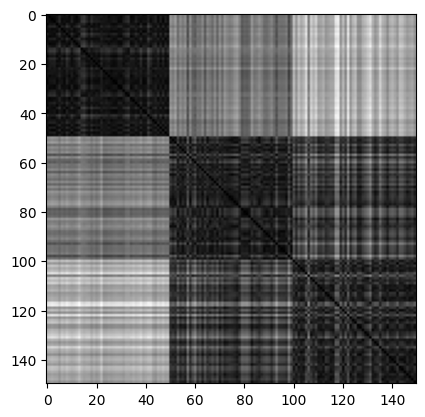

In [4]:
D = dt.load_iris()

X = D.data
y = D.target
dist = spd.squareform(spd.pdist(X, 'euclidean'))

plt.imshow(dist, cmap='gray')

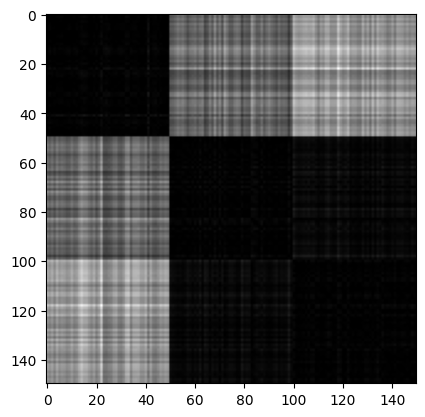

In [5]:
dist_cos = spd.squareform(spd.pdist(X, 'cosine'))
plt.imshow(dist_cos, cmap='gray')

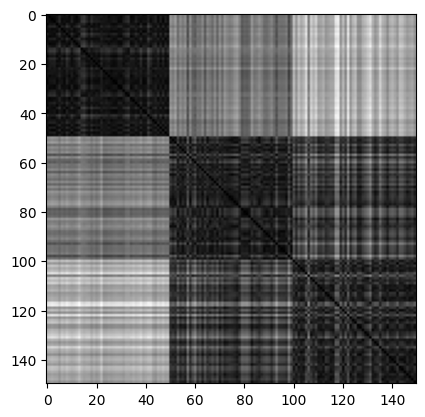

In [6]:
Xn = X - np.mean(X, axis=0)

plt.imshow(spd.squareform(spd.pdist(Xn, 'euclidean')), cmap='gray')

(2, 3000)
(2, 1000)


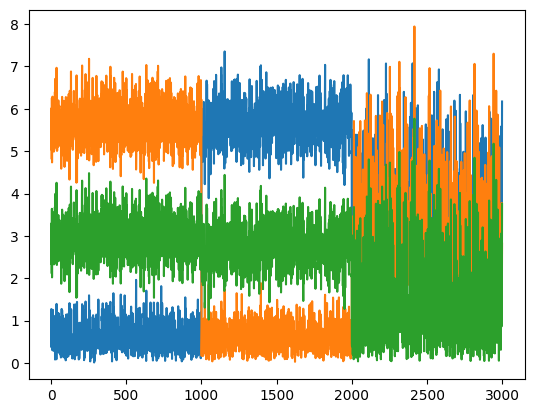

In [ ]:
D = pickle.load(open('data/LAB2distancias002.p', 'rb'))

X= D['X']
y= D['idxClass']

print(X.shape) #Matriz horizontal
# np.unique(y)

media_c1= np.mean(X[:, y==1], axis=1) #Quero todas s linhas mas só as colunas que têm a classe 1
media_c2= np.mean(X[:, y==2], axis=1)
media_c3= np.mean(X[:, y==3], axis=1)

X1 = X - media_c1[:,np.newaxis]
D1 = np.sqrt(np.sum(X1**2, axis=0))

X2 = X - media_c2[:,np.newaxis]
D2 = np.sqrt(np.sum(X2**2, axis=0))

X3 = X - media_c3[:,np.newaxis]
D3 = np.sqrt(np.sum(X3**2, axis=0))

plt.plot(D1)
plt.plot(D2)
plt.plot(D3)

In [9]:
D = np.vstack((D1, D2, D3))

print(D.shape)

ye = np.argmin(D, axis=0)+1

print(confusion_matrix(y, ye))

(3, 3000)
[[1000    0    0]
 [   0  997    3]
 [ 122  135  743]]


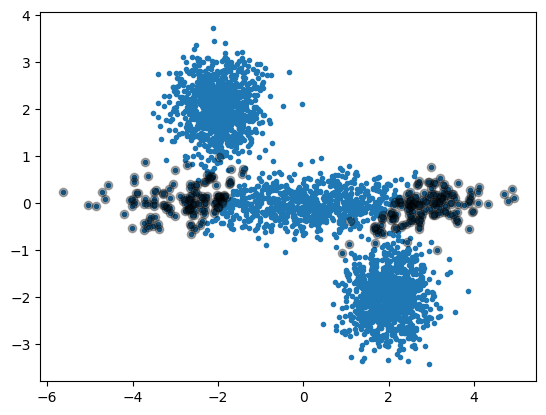

In [11]:
plt.plot(X[0,:],X[1,:],'.')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=.3)